In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [0]:
cascades_path = 'drive/My Drive/'
face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_eye_tree_eyeglasses.xml')
nose_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_mcs_nose.xml')

In [0]:
def face_detect(img):
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  if (len(faces) == 0 ):
    return None, None
  else:
    for (x , y, w, h) in faces:
      roi_gray = gray[y:y+h, x:x+w]
      roi_color = img[y:y+h, x:x+w]
      mask = np.zeros_like(roi_color)
      img_mask = np.zeros_like(img)
      rows, cols,_ = mask.shape
      img_mask = cv2.ellipse(img_mask,(int(rows/2)+x, int(cols/2)+y), (int((2*x+w)/2),int((2*y+h)/2)), angle=0, startAngle=0, endAngle=360, color=(255,255,255), thickness=-1)    
      img = np.bitwise_and(img_mask, img)
      img = img[y:y+h, x:x+w]
      img_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  return img,img_gray

In [0]:
images = []
label = []
filenames = os.listdir("/content/drive/My Drive/AVR_data")
for filename in filenames:
  sub_filenames = os.listdir("/content/drive/My Drive/AVR_data/"+filename)
  for sub_file in sub_filenames:
    image = cv2.imread("/content/drive/My Drive/AVR_data/"+filename + "/" +sub_file)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image, image_gray = face_detect(image)
    if image is not None:
      image_g = cv2.resize(image_gray , (64, 64))
      images.append(image_g)
      label.append(filename)

In [0]:
labels = np.array(label)
label_encoder = preprocessing.LabelEncoder()
enc_labels = label_encoder.fit_transform(labels) 
labels_unique = label_encoder.classes_
labels_unique = np.array(labels_unique)
enc_labels = np.array(enc_labels)
images = np.array(images)

624
624
624
Akhila


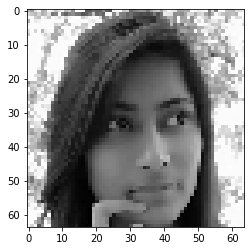

(624, 64, 64)


In [47]:
print(len(images))
print(len(labels))
print(len(enc_labels))
print(labels[50])
plt.imshow(images[50], cmap = 'gray')
plt.show()
print(images.shape)

In [0]:
face_recLBP = cv2.face.LBPHFaceRecognizer_create()

In [0]:
(X_train, X_test, y_train, y_test) = train_test_split(images, enc_labels, test_size=0.25, random_state=42)

In [0]:
face_recLBP.train(X_train, y_train)

In [0]:
def predic(X_test):
  predictions = []
  for img in X_test:
    predictions.append(face_recLBP.predict(img))
  return predictions

In [0]:
def accuracy(predictions, y_test):
  count = 0 
  for i in range(len(y_test)):
    if (predictions[i][0] == y_test[i]):
      count = count +1
  print("LBP accuracy" , 100*(count/(len(y_test)-1)))

In [0]:
predictions = predic(X_test)

In [54]:
accuracy(predictions, y_test)

LBP accuracy 86.45161290322581
